# Spiral Arm Plot 😺

In [1]:
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

# matplotlib configuration
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (3.27, 2)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['legend.fontsize'] = 10
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.3
plt.rcParams['font.family'] = 'Fira Code'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

C:\Users\rawol\AppData\Local\Temp\ipykernel_16808\4281792595.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return (np.arctan(y/x), np.sqrt(x**2 + y**2))


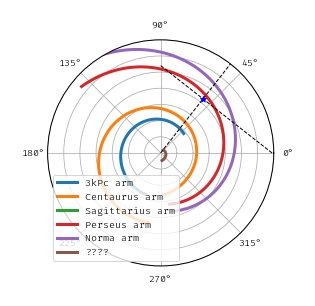

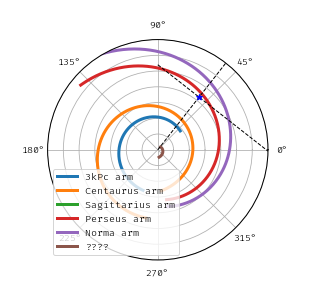

In [2]:
def gr_to_rad(theta): return (theta * np.pi) / 180
def rad_to_gr(theta): return (theta / np.pi) * 180

def spiral_arm(theta, *p):
  return np.exp(p[0] + p[1]*theta + p[2]*(theta**2) + p[3]*(theta**3))

def to_euclid(theta, r):
  return (r*np.cos(theta), r*np.sin(theta))
def to_polar(x, y):
  return (np.arctan(y/x), np.sqrt(x**2 + y**2))

R0 = 8.5
THETA0 = gr_to_rad(51.9)

#positie van de zon in euclidische coördinaten
(x_sun, y_sun) = to_euclid(THETA0, R0)

#x-as galactische coördinaten
a = -np.tan((np.pi / 2) - THETA0)
b = y_sun - (a*x_sun)

def plot_arms(ax):
  p_1 = [1.2170, 0.1442, -0.007552, 0]
  p_2 = [7.4413, -2.4138, 0.3103, -0.01222]
  p_3 = [6.8185, -2.1632, 0.2887, -0.1162]
  p_4 = [1.8419, -0.09367, 0.02001, 0]
  p_5 = [1.7020, -0.01485, 0.01522, 0]
  p_6 = [2.0497, -0.5168, 0.01807, 0]

  theta_1 = gr_to_rad(np.linspace(40, 250, 300))
  theta_2 = gr_to_rad(np.linspace(275, 620, 300))
  theta_3 = gr_to_rad(np.linspace(280, 625, 300))
  theta_4 = gr_to_rad(np.linspace(280, 500, 300))
  theta_5 = gr_to_rad(np.linspace(280, 500, 300))
  theta_6 = gr_to_rad(np.linspace(280, 405, 300))

  ax.plot(theta_1, spiral_arm(theta_1, *p_1), linewidth=3, label="3kPc arm")
  ax.plot(theta_2, spiral_arm(theta_2, *p_2), linewidth=3, label="Centaurus arm")
  ax.plot(theta_3, spiral_arm(theta_3, *p_3), linewidth=3, label="Sagittarius arm")
  ax.plot(theta_4, spiral_arm(theta_4, *p_4), linewidth=3, label="Perseus arm")
  ax.plot(theta_5, spiral_arm(theta_5, *p_5), linewidth=3, label="Norma arm")
  ax.plot(theta_6, spiral_arm(theta_6, *p_6), linewidth=3, label="????")

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(4,4))
plot_arms(ax)
plt.legend()
#add the sun and glactic coordinates
ax.scatter(THETA0, R0, marker='*', color='blue', zorder=25)
ax.plot(np.repeat(THETA0, 100), np.linspace(0, 2*R0, 100), linestyle='--', color='black', zorder=20)
ax.plot(*to_polar(np.linspace(0, 14), np.linspace(0, 14)*a + b), linestyle='--', color='black', zorder=20)

ax.set_yticklabels([])
ax.set_ylim(0, 14)
fig

Bron arm #1: ([6.97921562],[4.98160757]), distance=8.574722418601473
Bron arm #2: ([9.17639918],[2.95674033]), distance=9.640986215770878
Bron arm #3: ([6.34603239],[-5.1016092]), distance=8.14239175682784


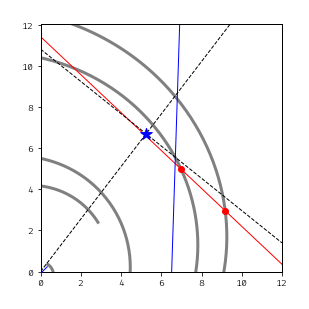

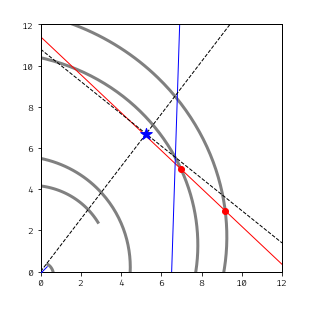

In [6]:
def plot_arm(p, xin, theta):
  r = spiral_arm(theta, *p)
  x_min, x_max = np.min(xin), np.max(xin)
  (x, y) = to_euclid(theta, r)
  mask = np.ma.masked_where((x >= x_min) & (x <= x_max), x).mask
  return x[mask], y[mask], theta[mask], r[mask]
  
def plot_arms_euclid(xin):
  global ps
  ps = np.array([
    [1.2170, 0.1442, -0.007552, 0],
    [7.4413, -2.4138, 0.3103, -0.01222],
    [6.8185, -2.1632, 0.2887, -0.1162],
    [1.8419, -0.09367, 0.02001, 0],
    [1.7020, -0.01485, 0.01522, 0],
    [2.0497, -0.5168, 0.01807, 0]
  ])

  global thetas
  thetas = np.array([
    gr_to_rad(np.linspace(40, 250, 300)),
    gr_to_rad(np.linspace(275, 620, 300)),
    gr_to_rad(np.linspace(280, 625, 300)),
    gr_to_rad(np.linspace(280, 500, 300)),
    gr_to_rad(np.linspace(280, 500, 300)),
    gr_to_rad(np.linspace(280, 405, 300))
  ])
  
  global xs, ys, thetas_prime, rs
  xs, ys, thetas_prime, rs = [], [], [], []
  for (p, theta) in zip(ps, thetas):
    x, y, theta, r = plot_arm(p, xin, theta)
    xs.append(x)
    ys.append(y)
    thetas_prime.append(theta)
    rs.append(r)
  
  for (x,y) in zip(xs, ys):
    plt.plot(x, y, linewidth=3, color="gray")

#start zhe plotting
fig = plt.figure(figsize=(4,4))
x = np.linspace(0, 12, 10000)
plot_arms_euclid(x)

#positie van de zon in euclidische coördinaten
(x_sun, y_sun) = to_euclid(THETA0, R0)

#x-as galactische coördinaten
a = -np.tan((np.pi / 2) - THETA0)
b = y_sun - (a*x_sun)

def los(theta, color):
  l = gr_to_rad(theta)
  delta = (3*np.pi/2) - abs(l) - abs(THETA0)
  a_los = np.tan(delta) #los = line of sight
  b_los = x_sun - (a_los*y_sun)
  #plot line-of-sight
  plt.plot(x, (a_los*x) + b_los, color=color)
  return a_los, b_los

#line of sight 1
a_los, b_los = los(80.75, 'r')
a_los2, b_los2 = los(130, 'b')

#assenstelsel galactische coördinaten
plt.plot(x, (a*x) + b, linestyle="--", color="black")
plt.plot(*to_euclid(np.repeat(THETA0, 100), np.linspace(0, 4*R0, 100)), linestyle='--', color='black')

def dist(curve_1x, curve_1y, curve_2x, curve_2y):
  return (curve_1x - curve_2x)**2 + (curve_1y - curve_2y)**2

#intersection sagitarius
d_sag = dist(xs[3], (a_los*xs[3]) + b_los, xs[3], ys[3])
idx_sag = np.where(d_sag == np.min(d_sag))
plt.scatter(xs[3][idx_sag], ys[3][idx_sag], color='red', zorder=20)
print(f"Bron arm #1: ({xs[3][idx_sag]},{ys[3][idx_sag]}), distance={np.sqrt(xs[3][idx_sag]**2 + ys[3][idx_sag]**2)[0]}")

#intersection perseus
d_norma = dist(xs[4], (a_los*xs[4]) + b_los, xs[4], ys[4])
idx_norma = np.where(d_norma == np.min(d_norma))
plt.scatter(xs[4][idx_norma], ys[4][idx_norma], color='red', zorder=20)
print(f"Bron arm #2: ({xs[4][idx_norma]},{ys[4][idx_norma]}), distance={np.sqrt(xs[4][idx_norma]**2 + ys[4][idx_norma]**2)[0]}")

#intersection richting 2
d_norma = dist(xs[4], (a_los2*xs[4]) + b_los2, xs[4], ys[4])
idx_norma = np.where(d_norma == np.min(d_norma))
plt.scatter(xs[4][idx_norma], ys[4][idx_norma], color='red', zorder=20)
print(f"Bron arm #3: ({xs[4][idx_norma]},{ys[4][idx_norma]}), distance={np.sqrt(xs[4][idx_norma]**2 + ys[4][idx_norma]**2)[0]}")

plt.scatter(x_sun, y_sun, marker='*', color='blue', s=[150], zorder=20)
plt.scatter(0,0, marker="x", color="blue", s=[150], zorder=20)
plt.xlim(0, 12)
plt.ylim(0, 12)
fig.savefig("../figs/galactic_trig.svg")
fig